In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
atlasAlignOptLogs_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_atlasAlignOptLogs_atlas'

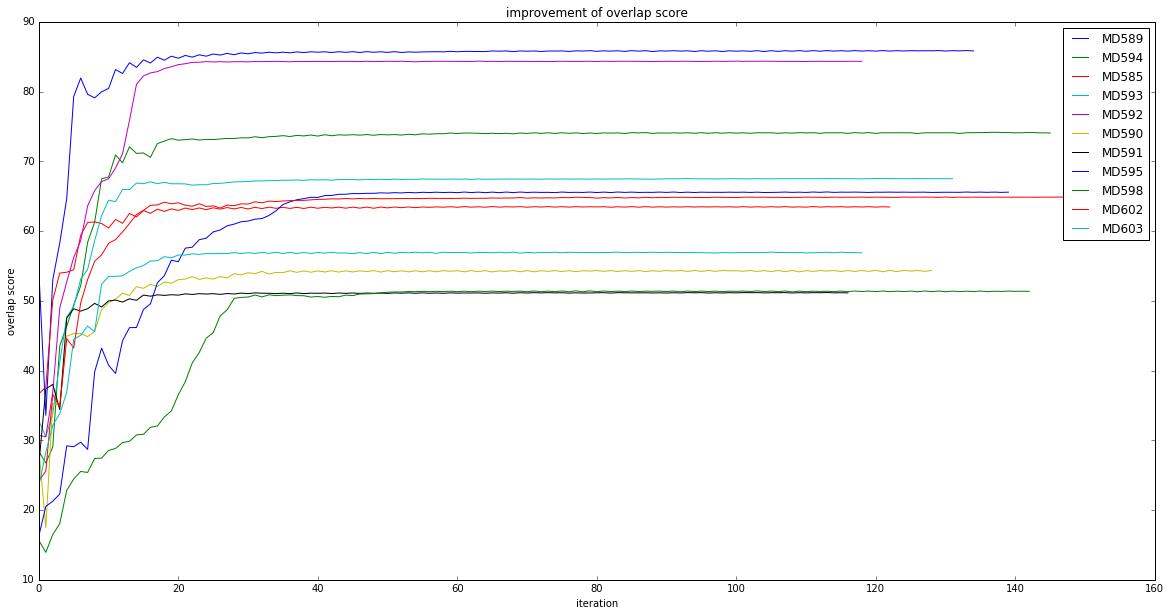

In [3]:
fig = plt.figure(figsize=(20,10));

for i, stack in enumerate(['MD589', 'MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602', 'MD603']):

    scores = np.load(atlasAlignOptLogs_dir + '/%(stack)s_scoreEvolutions.npy' % {'stack':stack})

    plt.plot(scores, label=stack);
    plt.title('improvement of overlap score');
    plt.xlabel('iteration');
    plt.ylabel('overlap score');

plt.legend()    
plt.show();

In [4]:
volume_landmark_names_unsided = ['12N', '5N', '6N', '7N', '7n', 'AP', 'Amb', 'LC',
                                 'LRt', 'Pn', 'R', 'RtTg', 'Tz', 'VLL', 'sp5']
linear_landmark_names_unsided = ['outerContour']

labels_unsided = volume_landmark_names_unsided + linear_landmark_names_unsided
labels_unsided_indices = dict((j, i+1) for i, j in enumerate(labels_unsided))  # BackG always 0

labelMap_unsidedToSided = {'12N': ['12N'],
                            '5N': ['5N_L', '5N_R'],
                            '6N': ['6N_L', '6N_R'],
                            '7N': ['7N_L', '7N_R'],
                            '7n': ['7n_L', '7n_R'],
                            'AP': ['AP'],
                            'Amb': ['Amb_L', 'Amb_R'],
                            'LC': ['LC_L', 'LC_R'],
                            'LRt': ['LRt_L', 'LRt_R'],
                            'Pn': ['Pn_L', 'Pn_R'],
                            'R': ['R_L', 'R_R'],
                            'RtTg': ['RtTg'],
                            'Tz': ['Tz_L', 'Tz_R'],
                            'VLL': ['VLL_L', 'VLL_R'],
                            'sp5': ['sp5'],
                           'outerContour': ['outerContour']}

labelMap_sidedToUnsided = {n: nu for nu, ns in labelMap_unsidedToSided.iteritems() for n in ns}

from itertools import chain
labels_sided = list(chain(*(labelMap_unsidedToSided[name_u] for name_u in labels_unsided)))
labels_sided_indices = dict((j, i+1) for i, j in enumerate(labels_sided)) # BackG always 0
labels_sided_indices['BackG'] = 0

In [5]:
import os

In [6]:
atlasAlignOptLogs_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_atlasAlignOptLogs_atlas_affine'

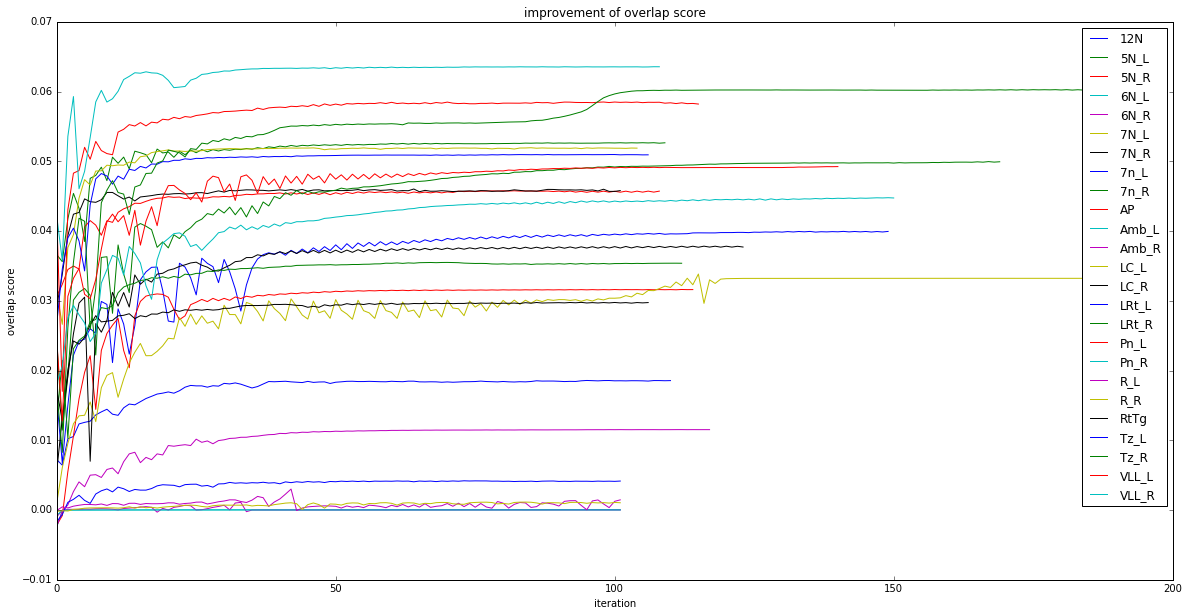

In [25]:
fig = plt.figure(figsize=(20,10));

# for i, stack in enumerate(['MD589', 'MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602', 'MD603']):
for i, stack in enumerate(['MD603']):

    for name_s in labels_sided:
    
        tf_fn = atlasAlignOptLogs_dir + '/%(stack)s/%(stack)s_%(name)s_scoreEvolutions_transformUponAffineProjection.npy' % {'stack':stack, 'name':name_s}
    
        if not os.path.exists(tf_fn):
            continue
        
        scores = np.load(tf_fn)

        plt.plot(scores, label=name_s);
        plt.title('improvement of overlap score');
        plt.xlabel('iteration');
        plt.ylabel('overlap score');

    plt.legend()
    plt.show();

In [ ]:
fig, axes = plt.subplots(9, 1, figsize=(20, 5*9), squeeze=True, sharex=True)

for i, stack in enumerate(['MD594', 'MD585', 'MD593', 'MD592', 'MD590', 'MD591', 'MD595', 'MD598', 'MD602']):

# stack = 'MD590'

    scores = np.load(atlasAlignOptLogs_dir + '/%(stack)s_scoreEvolutions.npy' % {'stack':stack})

    axes[i].plot(scores[:]);
    axes[i].set_title('improvement of overlap score %s' % stack);
#     axes[i].set_xlabel('iteration');
    axes[i].set_ylabel('overlap score');

plt.show();

In [ ]:
history_len = 50

ds = []
for i in range(len(scores)):
    s = scores[i]
    d = np.abs(np.mean(scores[i-history_len:i]) - np.mean(scores[i-2*history_len:i-history_len]))
    ds.append(d)
    if d < .1:
        print 'break'
        break
print i

In [ ]:
plt.plot(ds);
plt.title('changes in score');
plt.xlabel('iteration');
plt.ylabel('changes');
plt.show();